In [ ]:
# SUSTDengue Fever.csv
# full worl flow 
# importing a Dataframe
# visulization the data.
# cleanup and transform data 
# encode the data 
#  split training and test
# fine tune algorithm
# cross validation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
     
df = pd.read_csv("SUSTDengue Fever.csv")
df.head(10)

,sub_id,sex,age,wgt,Height (in meter ),Body Mass Index (BMI),fever,platelet,hemato,wbc,...,s_rash,headache,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target
0,DEN_0001,M,36,14,NaN,NaN,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,M,48,15,NaN,NaN,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,F,24,12,NaN,NaN,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,M,13,8,NaN,NaN,1,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,F,19,10,NaN,NaN,1,50000,35,2622,...,0,0,1,1,0,0,0,0,1,0
5,DEN_0006,M,21,11,NaN,NaN,1,30000,24,4000,...,0,1,0,1,0,1,0,0,0,1
6,DEN_0007,F,18,12,NaN,NaN,0,60000,35,8000,...,0,1,0,0,0,0,0,0,1,0
7,DEN_0008,M,30,13,NaN,NaN,1,20000,30,3500,...,0,0,0,1,1,0,1,0,1,1
8,DEN_0009,M,15,11,NaN,NaN,1,30000,25,3000,...,0,1,1,1,0,1,0,0,1,1
9,DEN_0010,F,48,14,NaN,NaN,0,50000,35,7000,...,0,1,0,0,0,0,0,0,0,0


In [2]:
# make column name prefix
df.columns = df.columns.str.replace(' ', '_').str.lower()
print(df.columns)

Index(['sub_id', 'sex', 'age', 'wgt', 'height_(in_meter_)',
       'body_mass_index_(bmi)', 'fever', 'platelet', 'hemato', 'wbc', 'j_pain',
       's_rash', 'headache_', 'abdo_pain', 'vomit', 'bleed', 'ns1_anti',
       'igm_anti', 'igg_anti', 'hospi', 'target'],
      dtype='object')


In [3]:
# checking total column and row
df.shape

(150, 21)

In [4]:
# checking null value
df.isnull().sum()

sub_id                     0
sex                        0
age                        0
wgt                        0
height_(in_meter_)       150
body_mass_index_(bmi)    150
fever                      0
platelet                   0
hemato                     0
wbc                        0
j_pain                     0
s_rash                     0
headache_                  0
abdo_pain                  0
vomit                      0
bleed                      0
ns1_anti                   0
igm_anti                   0
igg_anti                   0
hospi                      0
target                     0
dtype: int64

In [5]:
# Define a function to calculate height based on weight
def calculate_height(weight):
    height = weight * 10.0  #  Assume height is 10 times the weight
    return height

df['height_(in_meter_)'] = df['wgt'].apply(calculate_height)

In [6]:
df.head(10)

,sub_id,sex,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,...,s_rash,headache_,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target
0,DEN_0001,M,36,14,140.0,NaN,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,M,48,15,150.0,NaN,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,F,24,12,120.0,NaN,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,M,13,8,80.0,NaN,1,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,F,19,10,100.0,NaN,1,50000,35,2622,...,0,0,1,1,0,0,0,0,1,0
5,DEN_0006,M,21,11,110.0,NaN,1,30000,24,4000,...,0,1,0,1,0,1,0,0,0,1
6,DEN_0007,F,18,12,120.0,NaN,0,60000,35,8000,...,0,1,0,0,0,0,0,0,1,0
7,DEN_0008,M,30,13,130.0,NaN,1,20000,30,3500,...,0,0,0,1,1,0,1,0,1,1
8,DEN_0009,M,15,11,110.0,NaN,1,30000,25,3000,...,0,1,1,1,0,1,0,0,1,1
9,DEN_0010,F,48,14,140.0,NaN,0,50000,35,7000,...,0,1,0,0,0,0,0,0,0,0


In [7]:
df.isnull().sum()

sub_id                     0
sex                        0
age                        0
wgt                        0
height_(in_meter_)         0
body_mass_index_(bmi)    150
fever                      0
platelet                   0
hemato                     0
wbc                        0
j_pain                     0
s_rash                     0
headache_                  0
abdo_pain                  0
vomit                      0
bleed                      0
ns1_anti                   0
igm_anti                   0
igg_anti                   0
hospi                      0
target                     0
dtype: int64

In [8]:
# Define a function to calculate BMI
def calculate_bmi(row):
    weight_kg = row['wgt']  # Replace with your weight column name
    height_m = row['height_(in_meter_)']  # Replace with your height column name
    
    # Calculate BMI
    bmi = weight_kg / (height_m ** 2)
    return bmi

# Apply the calculate_bmi function to create a new 'body_mass_index_(bmi)' column
df['body_mass_index_(bmi)'] = df.apply(calculate_bmi, axis=1)

In [9]:
df.head(10)

,sub_id,sex,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,...,s_rash,headache_,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target
0,DEN_0001,M,36,14,140.0,0.000714,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,M,48,15,150.0,0.000667,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,F,24,12,120.0,0.000833,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,M,13,8,80.0,0.001250,1,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,F,19,10,100.0,0.001000,1,50000,35,2622,...,0,0,1,1,0,0,0,0,1,0
5,DEN_0006,M,21,11,110.0,0.000909,1,30000,24,4000,...,0,1,0,1,0,1,0,0,0,1
6,DEN_0007,F,18,12,120.0,0.000833,0,60000,35,8000,...,0,1,0,0,0,0,0,0,1,0
7,DEN_0008,M,30,13,130.0,0.000769,1,20000,30,3500,...,0,0,0,1,1,0,1,0,1,1
8,DEN_0009,M,15,11,110.0,0.000909,1,30000,25,3000,...,0,1,1,1,0,1,0,0,1,1
9,DEN_0010,F,48,14,140.0,0.000714,0,50000,35,7000,...,0,1,0,0,0,0,0,0,0,0


In [10]:
df.isnull().sum()

sub_id                   0
sex                      0
age                      0
wgt                      0
height_(in_meter_)       0
body_mass_index_(bmi)    0
fever                    0
platelet                 0
hemato                   0
wbc                      0
j_pain                   0
s_rash                   0
headache_                0
abdo_pain                0
vomit                    0
bleed                    0
ns1_anti                 0
igm_anti                 0
igg_anti                 0
hospi                    0
target                   0
dtype: int64

In [11]:
df_encoded = pd.get_dummies(df, columns=['sex'], prefix=['sex'])

# Convert the boolean columns to numeric (1 and 0)
df_encoded['sex_F'] = df_encoded['sex_F'].astype(int)
df_encoded['sex_M'] = df_encoded['sex_M'].astype(int)

# # Add the 'sex_F' and 'sex_M' columns back to the original dataset
df['sex_F'] = df_encoded['sex_F']
df['sex_M'] = df_encoded['sex_M']

In [12]:
df.head(5)

,sub_id,sex,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,...,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target,sex_F,sex_M
0,DEN_0001,M,36,14,140.0,0.000714,1,20000,40,6000,...,1,1,0,0,1,1,1,1,0,1
1,DEN_0002,M,48,15,150.0,0.000667,1,18000,38,5500,...,0,1,0,1,0,0,1,1,0,1
2,DEN_0003,F,24,12,120.0,0.000833,1,13000,45,6300,...,0,1,0,1,0,0,1,1,1,0
3,DEN_0004,M,13,8,80.0,0.001250,1,35000,29,7025,...,0,0,1,1,0,0,1,1,0,1
4,DEN_0005,F,19,10,100.0,0.001000,1,50000,35,2622,...,1,1,0,0,0,0,1,0,1,0


In [13]:
df.drop(columns=['sex','sub_id'], inplace=True)

In [14]:
df.describe()

,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,j_pain,s_rash,...,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target,sex_F,sex_M
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,73.820000,18.793333,187.933333,0.000578,0.926667,29653.333333,30.386667,3812.980000,0.360000,0.206667,...,0.346667,0.706667,0.206667,0.433333,0.193333,0.106667,0.720000,0.673333,0.400000,0.600000
std,40.135353,4.816494,48.164938,0.000198,0.261556,17866.765167,7.757903,1965.154565,0.481608,0.406271,...,0.477503,0.456815,0.406271,0.497196,0.396235,0.309723,0.450503,0.470565,0.491539,0.491539
min,4.000000,6.000000,60.000000,0.000333,0.000000,5000.000000,12.000000,1100.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,16.000000,160.000000,0.000455,1.000000,16000.000000,25.000000,2000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,19.000000,190.000000,0.000526,1.000000,25000.000000,31.000000,3500.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,109.750000,22.000000,220.000000,0.000625,1.000000,36000.000000,36.750000,5500.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,144.000000,30.000000,300.000000,0.001667,1.000000,95000.000000,45.000000,8000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
age_groups = {
    'infants': (0, 24),            # Age <= 2 years (0-24 months)
    'toddlers': (25, 60),          # 2 years < Age <= 5 years (25-60 months)
    'preschoolers': (61, 84),     # 5 years < Age <= 7 years (61-84 months)
    'school-age': (85, 144)       # 7 years < Age <= 12 years (85-144 months)
}
def assign_age_group(age_in_months):
    for group, (lower, upper) in age_groups.items():
        if lower <= age_in_months <= upper:
            return group
    return 'unknown'  # Assign 'unknown' if age doesn't fall into any group
df['Age Groups'] = df['age'].apply(assign_age_group)

In [16]:
df.describe()

,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,j_pain,s_rash,...,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target,sex_F,sex_M
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,73.820000,18.793333,187.933333,0.000578,0.926667,29653.333333,30.386667,3812.980000,0.360000,0.206667,...,0.346667,0.706667,0.206667,0.433333,0.193333,0.106667,0.720000,0.673333,0.400000,0.600000
std,40.135353,4.816494,48.164938,0.000198,0.261556,17866.765167,7.757903,1965.154565,0.481608,0.406271,...,0.477503,0.456815,0.406271,0.497196,0.396235,0.309723,0.450503,0.470565,0.491539,0.491539
min,4.000000,6.000000,60.000000,0.000333,0.000000,5000.000000,12.000000,1100.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,16.000000,160.000000,0.000455,1.000000,16000.000000,25.000000,2000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,19.000000,190.000000,0.000526,1.000000,25000.000000,31.000000,3500.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,109.750000,22.000000,220.000000,0.000625,1.000000,36000.000000,36.750000,5500.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,144.000000,30.000000,300.000000,0.001667,1.000000,95000.000000,45.000000,8000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.head(10)

,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,j_pain,s_rash,...,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target,sex_F,sex_M,Age Groups
0,36,14,140.0,0.000714,1,20000,40,6000,1,0,...,1,0,0,1,1,1,1,0,1,toddlers
1,48,15,150.0,0.000667,1,18000,38,5500,0,0,...,1,0,1,0,0,1,1,0,1,toddlers
2,24,12,120.0,0.000833,1,13000,45,6300,1,0,...,1,0,1,0,0,1,1,1,0,infants
3,13,8,80.0,0.001250,1,35000,29,7025,0,0,...,0,1,1,0,0,1,1,0,1,infants
4,19,10,100.0,0.001000,1,50000,35,2622,1,0,...,1,0,0,0,0,1,0,1,0,infants
5,21,11,110.0,0.000909,1,30000,24,4000,0,0,...,1,0,1,0,0,0,1,0,1,infants
6,18,12,120.0,0.000833,0,60000,35,8000,1,0,...,0,0,0,0,0,1,0,1,0,infants
7,30,13,130.0,0.000769,1,20000,30,3500,1,0,...,1,1,0,1,0,1,1,0,1,toddlers
8,15,11,110.0,0.000909,1,30000,25,3000,0,0,...,1,0,1,0,0,1,1,0,1,infants
9,48,14,140.0,0.000714,0,50000,35,7000,0,0,...,0,0,0,0,0,0,0,1,0,toddlers


In [18]:
# handeling age group categorical value into numerical value 
df = pd.get_dummies(df, columns=['Age Groups'], prefix='Age_Group')
# # Convert boolean values (True/False) to integers (1/0) for one-hot encoded columns
df['Age_Group_infants'] = df['Age_Group_infants'].astype(int)
df['Age_Group_toddlers'] = df['Age_Group_toddlers'].astype(int)
df['Age_Group_preschoolers'] = df['Age_Group_preschoolers'].astype(int)
df['Age_Group_school-age'] = df['Age_Group_school-age'].astype(int)

In [19]:
# Define a list of symptom columns
symptom_columns = ['fever', 'j_pain', 's_rash', 'headache_', 'abdo_pain', 'vomit', 'bleed']
# Create a new column 'Symptom Count' that sums the symptom columns for each child
df['Symptom Count'] = df[symptom_columns].sum(axis=1)

In [20]:
# Blood Counts features creations
platelet_weight = 0.4
hemato_weight = 0.3
wbc_weight = 0.3
# Create a new column 'Blood Health' as a weighted sum of the blood count components
df['Blood Health'] = (
    df['platelet'] * platelet_weight +
    df['hemato'] * hemato_weight +
    df['wbc'] * wbc_weight 
)

In [21]:
# Symptom Patterns: Creating features that capture specific symptom patterns can help identify common presentation patterns in pediatric Dengue cases.
# Define symptom patterns (create new columns for each pattern)
df['Fever_Headache'] = (df['fever'] & df['headache_']).astype(int)
df['Fever_JointPain'] = (df['fever'] & df['j_pain']).astype(int)
df['Fever_SkinRash'] = (df['fever'] & df['s_rash']).astype(int)
df['Vomit_Abdo_Pain'] = (df['vomit'] & df['abdo_pain']).astype(int)
df['Bleed_Headache'] = (df['bleed'] & df['headache_']).astype(int)

In [22]:
# Combine antibody response columns into a single feature
df['Antibody_Response'] = df['ns1_anti'] + df['igm_anti'] + df['igg_anti']

In [23]:
# Assuming that a non-null value in the 'hospi' column indicates hospitalization
df['Hospitalized'] = df['hospi'].notnull().astype(int)

In [24]:
# Define a list of symptom columns
symptom_columns = ['fever', 'j_pain', 's_rash', 'headache_', 'abdo_pain', 'vomit', 'bleed']
threshold = 2
df['Multiple_Symptoms'] = (df[symptom_columns].sum(axis=1) >= threshold).astype(int)

In [25]:
# Hematocrit and Platelet Ratios:
hct_column = 'hemato'
platelet_column = 'platelet'
df['HPR'] = df[hct_column] / df[platelet_column]

In [26]:
df.head(10)

,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,j_pain,s_rash,...,Blood Health,Fever_Headache,Fever_JointPain,Fever_SkinRash,Vomit_Abdo_Pain,Bleed_Headache,Antibody_Response,Hospitalized,Multiple_Symptoms,HPR
0,36,14,140.0,0.000714,1,20000,40,6000,1,0,...,9812.0,1,1,0,1,0,2,1,1,0.002000
1,48,15,150.0,0.000667,1,18000,38,5500,0,0,...,8861.4,0,0,0,0,0,1,1,1,0.002111
2,24,12,120.0,0.000833,1,13000,45,6300,1,0,...,7103.5,1,1,0,0,0,1,1,1,0.003462
3,13,8,80.0,0.001250,1,35000,29,7025,0,0,...,16116.2,1,0,0,0,1,1,1,1,0.000829
4,19,10,100.0,0.001000,1,50000,35,2622,1,0,...,20797.1,0,1,0,1,0,0,1,1,0.000700
5,21,11,110.0,0.000909,1,30000,24,4000,0,0,...,13207.2,1,0,0,0,0,1,1,1,0.000800
6,18,12,120.0,0.000833,0,60000,35,8000,1,0,...,26410.5,0,0,0,0,0,0,1,1,0.000583
7,30,13,130.0,0.000769,1,20000,30,3500,1,0,...,9059.0,0,1,0,0,0,1,1,1,0.001500
8,15,11,110.0,0.000909,1,30000,25,3000,0,0,...,12907.5,1,0,0,1,0,1,1,1,0.000833
9,48,14,140.0,0.000714,0,50000,35,7000,0,0,...,22110.5,0,0,0,0,0,0,1,0,0.000700


In [27]:
df.describe()

,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,j_pain,s_rash,...,Blood Health,Fever_Headache,Fever_JointPain,Fever_SkinRash,Vomit_Abdo_Pain,Bleed_Headache,Antibody_Response,Hospitalized,Multiple_Symptoms,HPR
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000
mean,73.820000,18.793333,187.933333,0.000578,0.926667,29653.333333,30.386667,3812.980000,0.360000,0.206667,...,13014.343333,0.686667,0.320000,0.20000,0.186667,0.180000,0.733333,1.0,0.973333,0.001419
std,40.135353,4.816494,48.164938,0.000198,0.261556,17866.765167,7.757903,1965.154565,0.481608,0.406271,...,7166.993382,0.465403,0.468039,0.40134,0.390949,0.385475,0.747853,0.0,0.161647,0.001016
min,4.000000,6.000000,60.000000,0.000333,0.000000,5000.000000,12.000000,1100.000000,0.000000,0.000000,...,3362.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,0.000000,0.000179
25%,35.000000,16.000000,160.000000,0.000455,1.000000,16000.000000,25.000000,2000.000000,0.000000,0.000000,...,7623.600000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.000000,0.000768
50%,72.000000,19.000000,190.000000,0.000526,1.000000,25000.000000,31.000000,3500.000000,0.000000,0.000000,...,11235.350000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0,1.000000,0.001145
75%,109.750000,22.000000,220.000000,0.000625,1.000000,36000.000000,36.750000,5500.000000,1.000000,0.000000,...,15637.725000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.0,1.000000,0.001807
max,144.000000,30.000000,300.000000,0.001667,1.000000,95000.000000,45.000000,8000.000000,1.000000,1.000000,...,38965.100000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,1.0,1.000000,0.008000


C:\Users\Mahbub\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

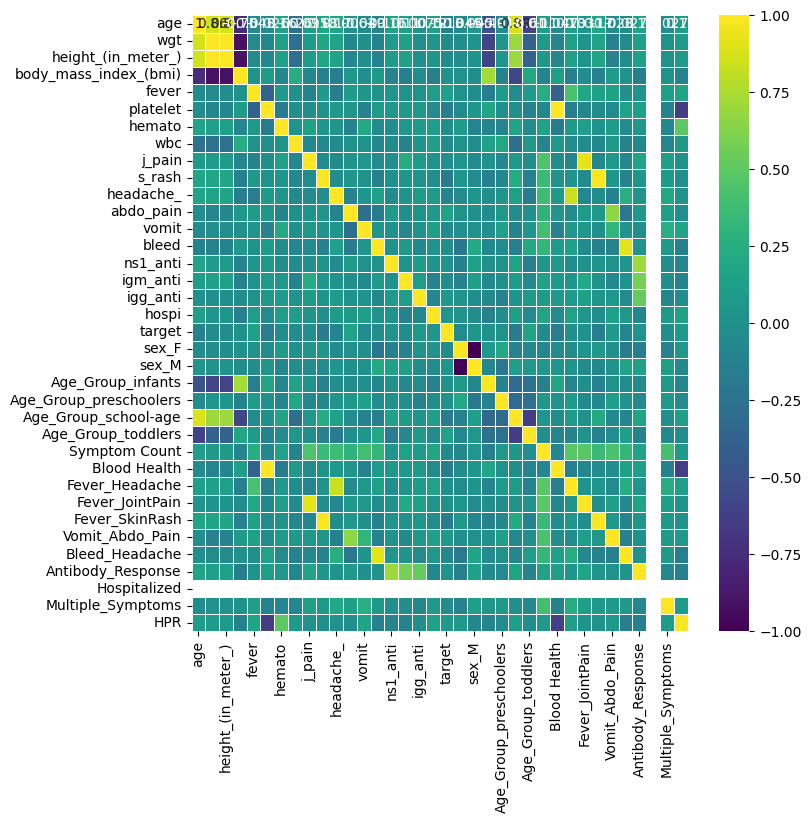

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [29]:
df.columns

Index(['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'fever',
       'platelet', 'hemato', 'wbc', 'j_pain', 's_rash', 'headache_',
       'abdo_pain', 'vomit', 'bleed', 'ns1_anti', 'igm_anti', 'igg_anti',
       'hospi', 'target', 'sex_F', 'sex_M', 'Age_Group_infants',
       'Age_Group_preschoolers', 'Age_Group_school-age', 'Age_Group_toddlers',
       'Symptom Count', 'Blood Health', 'Fever_Headache', 'Fever_JointPain',
       'Fever_SkinRash', 'Vomit_Abdo_Pain', 'Bleed_Headache',
       'Antibody_Response', 'Hospitalized', 'Multiple_Symptoms', 'HPR'],
      dtype='object')

In [30]:
df.drop(columns=
        [
            'Multiple_Symptoms',
            'Hospitalized',
            'Vomit_Abdo_Pain',
            'Fever_Headache',
            'Symptom Count',
            'Age_Group_toddlers',
            'Age_Group_preschoolers',
            'hospi',
            'igg_anti',
            'igm_anti',
            'headache_',
            's_rash'
        ], inplace=True)

In [31]:
# Create a StandardScaler
from sklearn.preprocessing import StandardScaler
continuous_features = ['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'platelet', 'hemato', 'wbc']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [32]:
print(df[continuous_features])

          age       wgt  height_(in_meter_)  body_mass_index_(bmi)  platelet  \
0   -0.945468 -0.998525           -0.998525               0.688872 -0.542106   
1   -0.645478 -0.790210           -0.790210               0.448054 -0.654420   
2   -1.245458 -1.415156           -1.415156               1.290918 -0.935207   
3   -1.520449 -2.248418           -2.248418               3.398079  0.300255   
4   -1.370454 -1.831787           -1.831787               2.133783  1.142615   
..        ...       ...                 ...                    ...       ...   
145  1.054465  0.876314            0.876314              -0.724627  0.300255   
146  1.104463  1.084629            1.084629              -0.816243  0.075625   
147  0.679477  0.667998            0.667998              -0.624683 -0.485948   
148  0.529482  0.459683            0.459683              -0.515220 -0.822892   
149  1.529449  1.292945            1.292945              -0.900530 -0.766735   

       hemato       wbc  
0    1.243318

In [34]:
# Data Splitting:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Define the features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target' with your target column name
y = df['target']

# Xtrain, Xtest, ytrain, ytest = train_test_split(X[:3000], y[:3000], test_size=0.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

random_model = RandomForestClassifier(n_estimators=300, random_state = 42, n_jobs = -1)

#Fit
random_model.fit(X_train,  y_train)
y_pred = random_model.predict(X_test)

#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy, 2), '%')


100.0 %


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define your features (X) and target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# Initialize your classifier (RandomForestClassifier in this example)
rf_classifier = RandomForestClassifier(n_estimators=3000, random_state=42)

# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.76666667 0.66666667 0.66666667 0.6        0.5       ]
Mean Accuracy: 0.64


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define your features (X) and target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# Initialize your regressor (RandomForestRegressor in this example)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive (closer to zero is better)
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores (MSE):", cv_scores)
print("Mean MSE:", cv_scores.mean())


Cross-Validation Scores (MSE): [0.22209333 0.21509667 0.21196    0.22293    0.37200667]
Mean MSE: 0.24881733333333336


In [67]:
print(df.columns)

Index(['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'fever',
       'platelet', 'hemato', 'wbc', 'j_pain', 's_rash', 'headache_',
       'abdo_pain', 'vomit', 'bleed', 'ns1_anti', 'igm_anti', 'igg_anti',
       'hospi', 'target', 'sex_F', 'sex_M', 'Age_Group_infants',
       'Age_Group_preschoolers', 'Age_Group_school-age', 'Age_Group_toddlers',
       'Symptom Count', 'Blood Health', 'Fever_Headache', 'Fever_JointPain',
       'Fever_SkinRash', 'Vomit_Abdo_Pain', 'Bleed_Headache',
       'Antibody_Response', 'Hospitalized', 'Multiple_Symptoms', 'HPR'],
      dtype='object')


                            age       wgt  height_(in_meter_)  \
age                    1.000000  0.861891            0.861891   
wgt                    0.861891  1.000000            1.000000   
height_(in_meter_)     0.861891  1.000000            1.000000   
body_mass_index_(bmi) -0.752128 -0.910056           -0.910056   
fever                 -0.042822 -0.033421           -0.033421   
sex_F                 -0.045314 -0.024379           -0.024379   
sex_M                  0.045314  0.024379            0.024379   
target                -0.132129 -0.032948           -0.032948   

                       body_mass_index_(bmi)     fever     sex_F     sex_M  \
age                                -0.752128 -0.042822 -0.045314  0.045314   
wgt                                -0.910056 -0.033421 -0.024379  0.024379   
height_(in_meter_)                 -0.910056 -0.033421 -0.024379  0.024379   
body_mass_index_(bmi)               1.000000  0.015172  0.018893 -0.018893   
fever                   

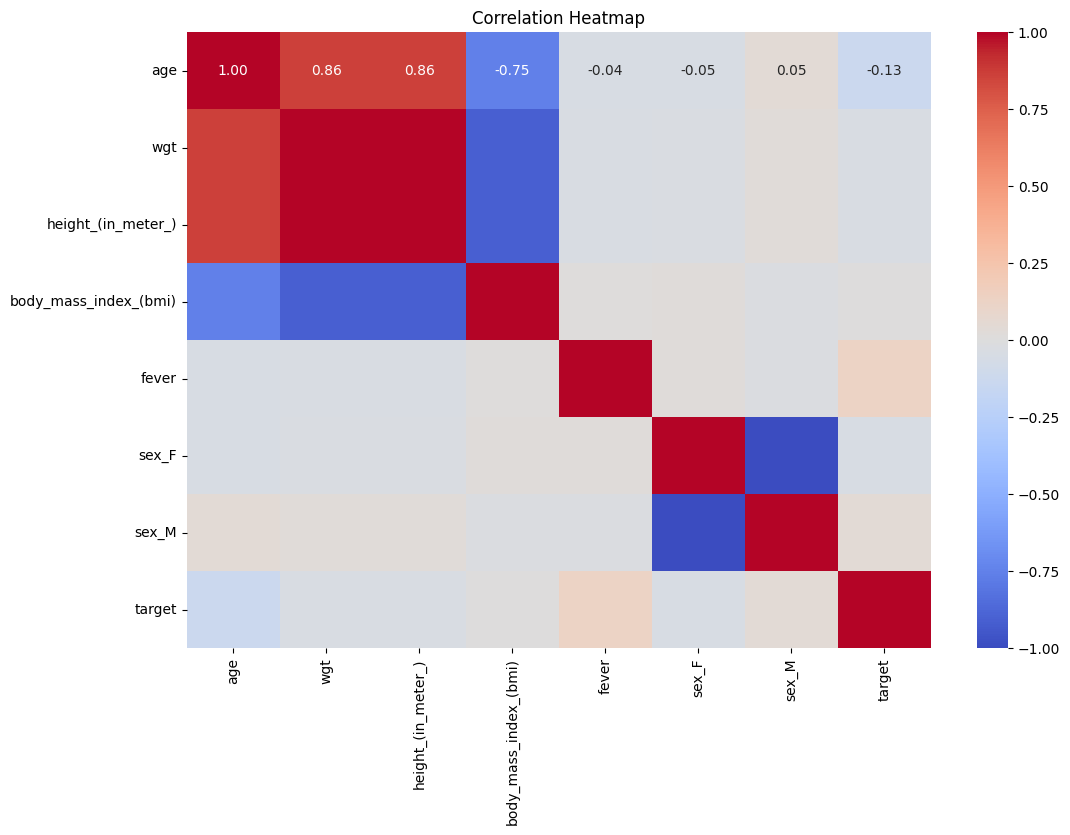

In [36]:

numerical_features = ['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'fever',
                     'sex_F','sex_M']

# Add the target variable 'target' to the list of features
numerical_features.append('target')

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Print the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have loaded your dataset into a DataFrame called 'df'
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)



# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        22

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



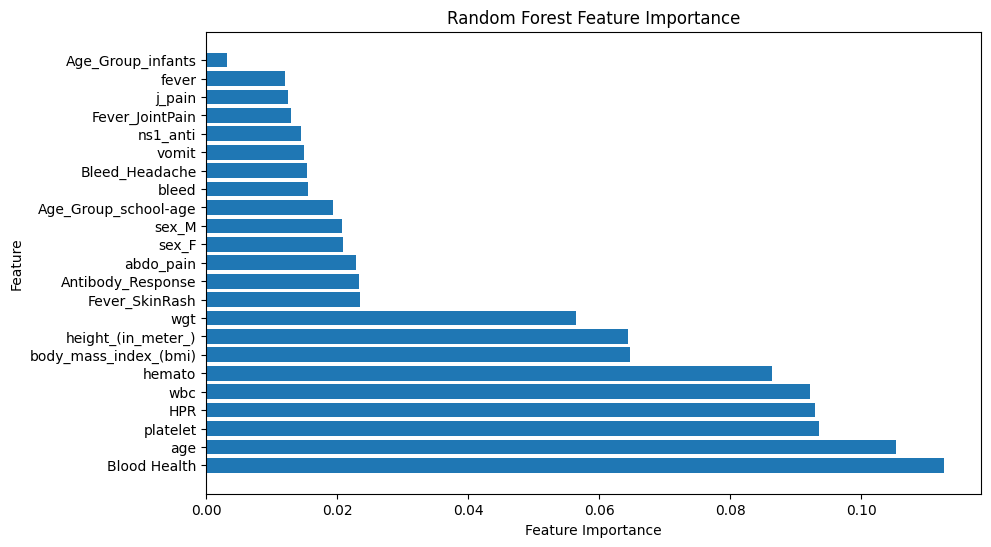

In [38]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [39]:
print(df.columns)

Index(['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'fever',
       'platelet', 'hemato', 'wbc', 'j_pain', 'abdo_pain', 'vomit', 'bleed',
       'ns1_anti', 'target', 'sex_F', 'sex_M', 'Age_Group_infants',
       'Age_Group_school-age', 'Blood Health', 'Fever_JointPain',
       'Fever_SkinRash', 'Bleed_Headache', 'Antibody_Response', 'HPR'],
      dtype='object')


In [40]:
df.to_excel('updated_preprocessed_data.xlsx', index=False)
from IPython.display import FileLink
FileLink('updated_preprocessed_data.xlsx')

C:\Users\Mahbub\updated_preprocessed_data.xlsx

In [41]:
# Save the updated dataset as a CSV file
df.to_csv('preprocessed_data.csv', index=False)
from IPython.display import FileLink
FileLink('preprocessed_data.csv')

C:\Users\Mahbub\preprocessed_data.csv